In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import statsmodels.api as sm
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/2_4_2021_updated_compiled_dataset.csv')

In [3]:
df.dtypes

County                                                                                  object
Budget                                                                                 float64
First Year Gross kWh                                                                   float64
Population                                                                               int64
Mean Income (dollars) (household income with earnings, with wages or salary income)      int64
IRR                                                                                    float64
Tax Revenue (2016-2018)                                                                 object
CES Score Median                                                                       float64
First Year Gross Therm                                                                 float64
First Year Net kWh                                                                     float64
First Year Net Therm                              

In [4]:
df = df.rename(columns = {'Mean Income (dollars) (household income with earnings, with wages or salary income)': 'Mean Income'})

In [5]:
df.dtypes

County                      object
Budget                     float64
First Year Gross kWh       float64
Population                   int64
Mean Income                  int64
IRR                        float64
Tax Revenue (2016-2018)     object
CES Score Median           float64
First Year Gross Therm     float64
First Year Net kWh         float64
First Year Net Therm       float64
Total Claims                 int64
Total Programs               int64
dtype: object

In [6]:
df['Tax Revenue (2016-2018)'] = df['Tax Revenue (2016-2018)'].str.replace(',', '')
df['Tax Revenue (2016-2018)'] = df['Tax Revenue (2016-2018)'].astype('float64')

In [7]:
Y = df['Budget'] #dependent variables
B1 = df['First Year Gross kWh']
B2 = df['First Year Gross Therm']

In [8]:
X = df[['Population', 'Mean Income', 'Tax Revenue (2016-2018)', 'CES Score Median', 'IRR']]

In [9]:
lm = sm.OLS(Y,X)
lm1 = sm.OLS(B1, X)
lm2 = sm.OLS(B2, X)

In [10]:
budget_model = lm.fit()
kWh_savings_model = lm1.fit()
Therm_savings_model = lm2.fit()

In [11]:
print(budget_model.summary())
print(kWh_savings_model.summary())
print(Therm_savings_model.summary())



                                 OLS Regression Results                                
Dep. Variable:                 Budget   R-squared (uncentered):                   0.571
Model:                            OLS   Adj. R-squared (uncentered):              0.530
Method:                 Least Squares   F-statistic:                              14.11
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                    9.02e-09
Time:                        11:47:43   Log-Likelihood:                         -965.17
No. Observations:                  58   AIC:                                      1940.
Df Residuals:                      53   BIC:                                      1951.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

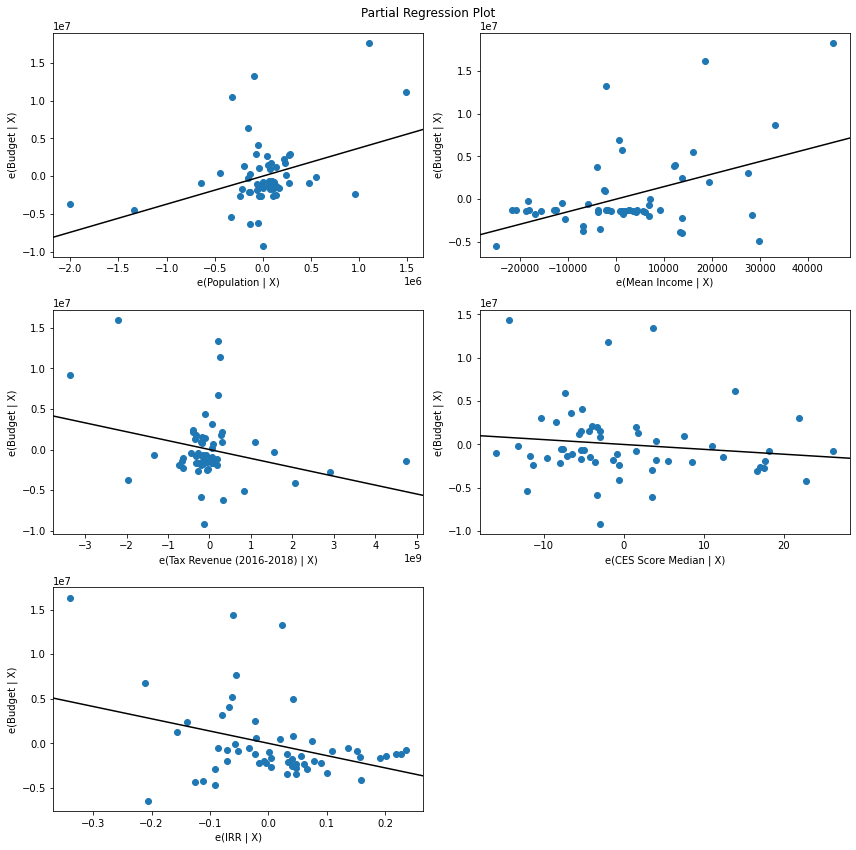

In [12]:
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_partregress_grid(budget_model, fig=fig)
plt.savefig('budget_regression')


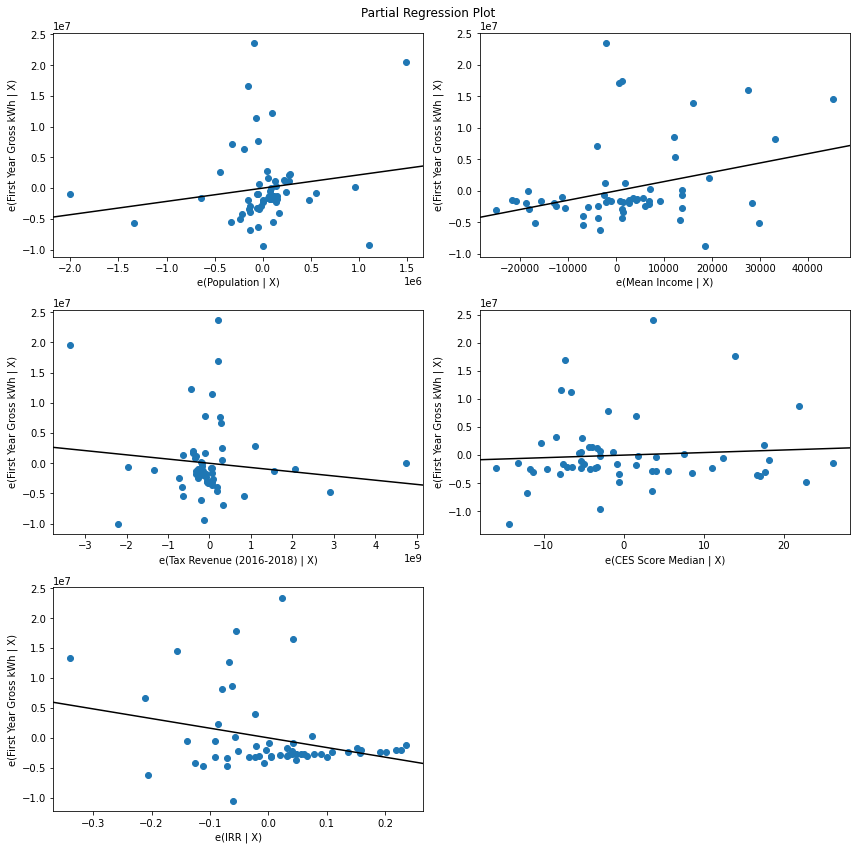

In [13]:
pig = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(kWh_savings_model, fig=pig)
plt.savefig('kWh_regression')


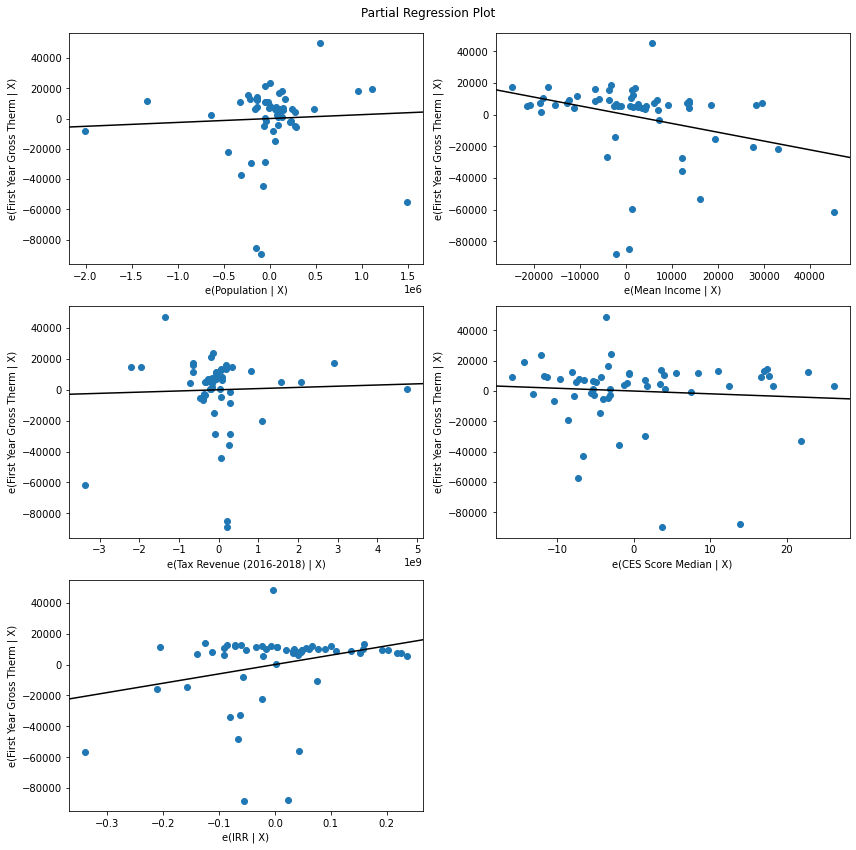

In [14]:
big = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(Therm_savings_model, fig=big)
plt.savefig('therm_regression')


**Taking out counties that have never participated in an ee program before**

In [15]:
only_programs = df[df['Total Programs'] != 0]

In [16]:
YY = only_programs['Budget'] #dependent variables
BB1 = only_programs['First Year Gross kWh']
BB2 = only_programs['First Year Gross Therm']

In [17]:
XX = only_programs[['Population', 'Mean Income', 'Tax Revenue (2016-2018)', 'CES Score Median', 'IRR']]

In [18]:
m = sm.OLS(YY,XX)
m1 = sm.OLS(BB1, XX)
m2 = sm.OLS(BB2, XX)

In [19]:
budget_model_programs = m.fit()
kWh_savings_model_programs = m1.fit()
Therm_savings_model_programs = m2.fit()

In [20]:
print(budget_model_programs.summary())
print(kWh_savings_model_programs.summary())
print(Therm_savings_model_programs.summary())



                                 OLS Regression Results                                
Dep. Variable:                 Budget   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              11.57
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                    4.10e-05
Time:                        11:47:47   Log-Likelihood:                         -386.56
No. Observations:                  23   AIC:                                      783.1
Df Residuals:                      18   BIC:                                      788.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

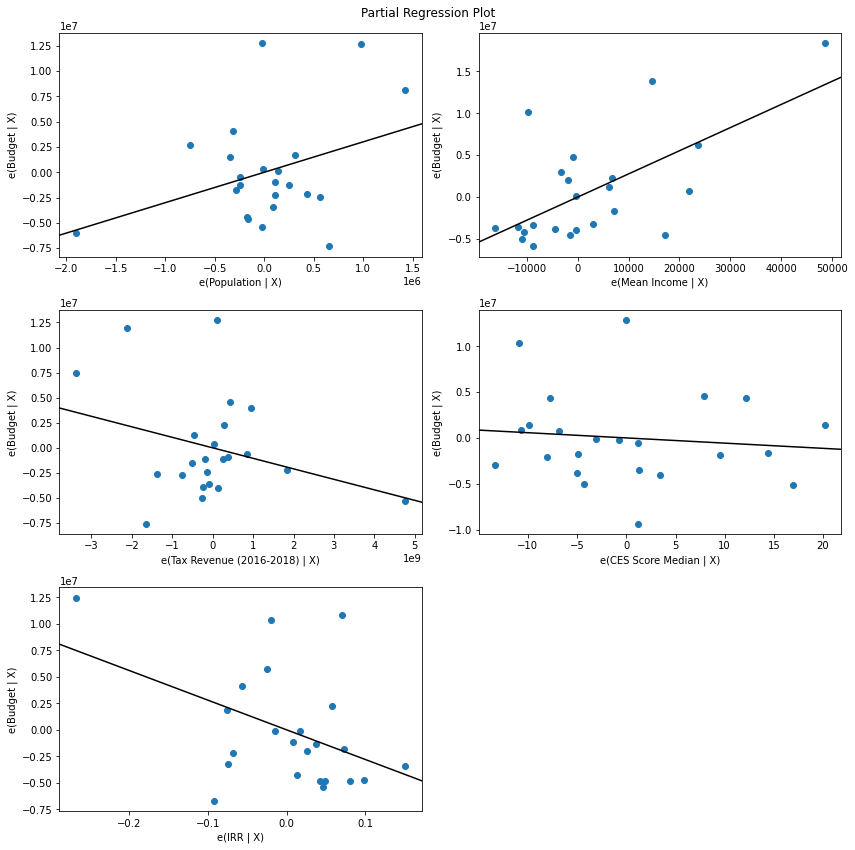

In [21]:
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_partregress_grid(budget_model_programs, fig=fig)
plt.savefig('budget_regression_programs')
    

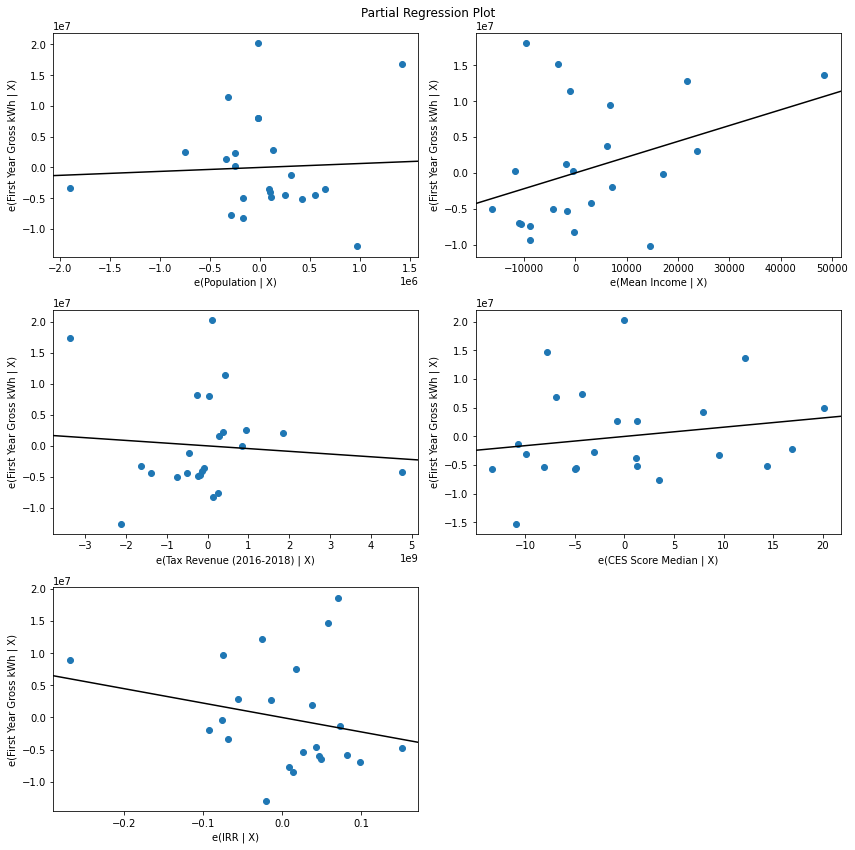

In [22]:
pig = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(kWh_savings_model_programs, fig=pig)
plt.savefig('kWh_regression_programs')


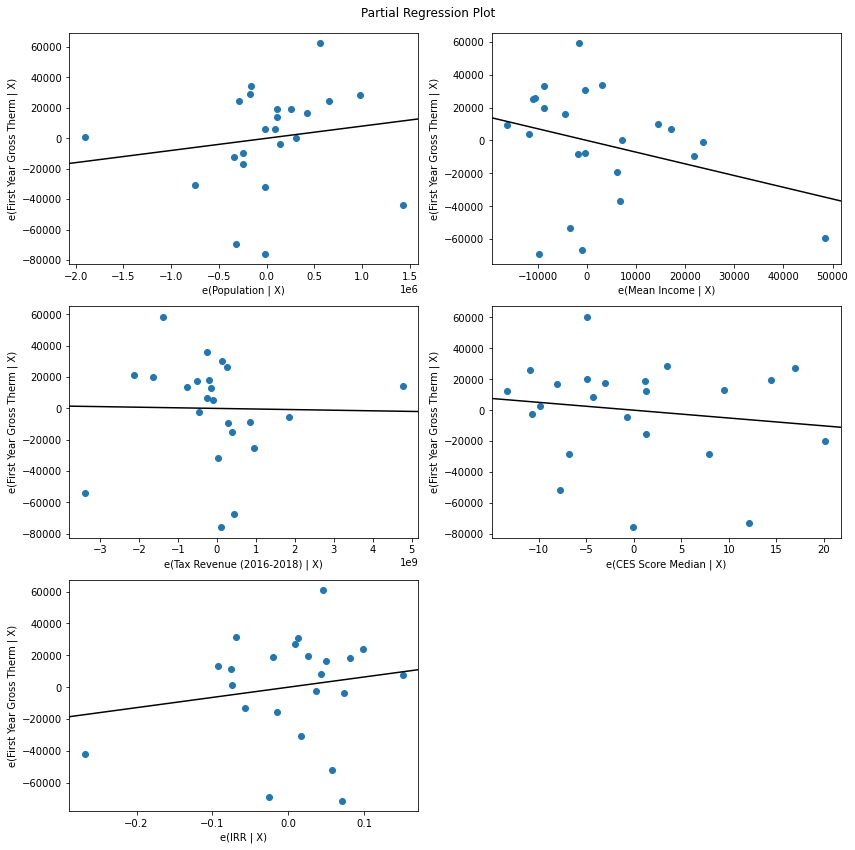

In [23]:
big = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(Therm_savings_model_programs, fig=big)
plt.savefig('therm_regression_programs')
